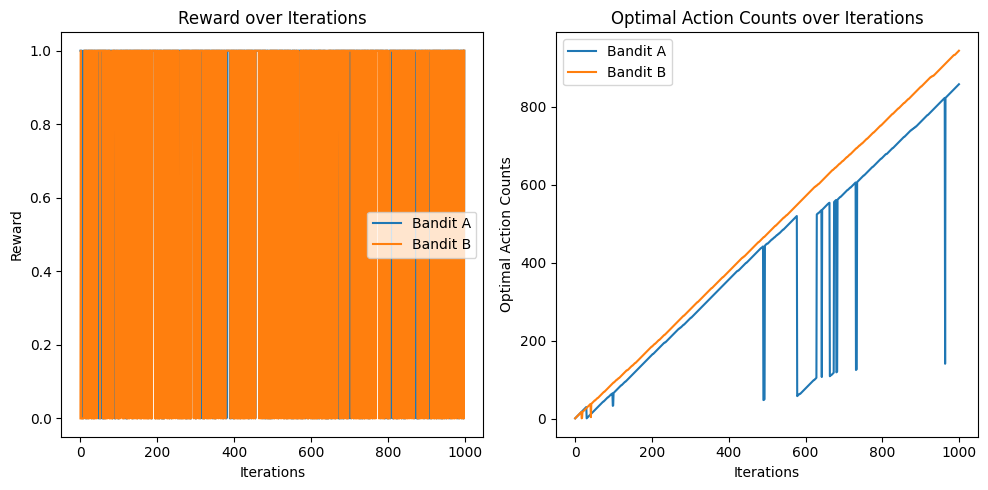

In [ ]:
#Q1
import numpy as np
import matplotlib.pyplot as plt

class BinaryBandit:
    def __init__(self, prob_success):
        self.prob_success = prob_success

    def pull_arm(self):
        if np.random.rand() < self.prob_success:
            return 1  # Success
        else:
            return 0  # Failure

def epsilon_greedy(bandit, epsilon, num_iterations):
    num_actions = 2  # Two actions: 1 and 2
    q_values = np.zeros(num_actions)
    action_counts = np.zeros(num_actions)

    rewards = []
    optimal_action_counts = []
    optimal_action = np.argmax(q_values)

    for i in range(num_iterations):
        if np.random.rand() < epsilon:
            action = np.random.randint(num_actions)  # Explore
        else:
            action = optimal_action  # Exploit

        reward = bandit.pull_arm()  # Removed the argument
        rewards.append(reward)

        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]

        optimal_action = np.argmax(q_values)
        optimal_action_counts.append(action_counts[optimal_action])

    return rewards, optimal_action_counts

# Define bandits A and B with their success probabilities
banditA = BinaryBandit(0.8)
banditB = BinaryBandit(0.6)

# Run epsilon-greedy algorithm for bandit A and bandit B
epsilon = 0.1
num_iterations = 1000
rewardsA, optimal_action_countsA = epsilon_greedy(banditA, epsilon, num_iterations)
rewardsB, optimal_action_countsB = epsilon_greedy(banditB, epsilon, num_iterations)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(num_iterations), rewardsA, label='Bandit A')
plt.plot(np.arange(num_iterations), rewardsB, label='Bandit B')
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend()
plt.title('Reward over Iterations')

plt.subplot(1, 2, 2)
plt.plot(np.arange(num_iterations), optimal_action_countsA, label='Bandit A')
plt.plot(np.arange(num_iterations), optimal_action_countsB, label='Bandit B')
plt.xlabel('Iterations')
plt.ylabel('Optimal Action Counts')
plt.legend()
plt.title('Optimal Action Counts over Iterations')

plt.tight_layout()
plt.show()


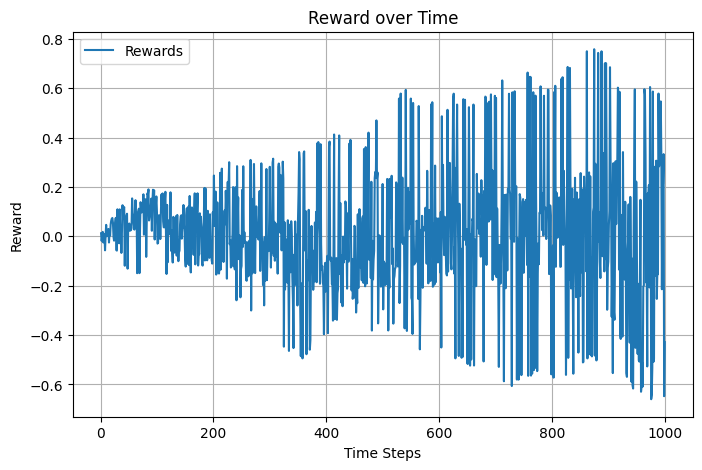

In [ ]:
#Q2
import numpy as np
import matplotlib.pyplot as plt

class TenArmedBandit:
    def __init__(self, num_arms, initial_reward=0.0, std_dev=0.01):
        self.num_arms = num_arms
        self.mean_rewards = np.full(num_arms, initial_reward)
        self.std_dev = std_dev

    def pull_arm(self, action):
        return np.random.normal(self.mean_rewards[action], self.std_dev)

def bandit_nonstat(action, bandit):
    reward = bandit.pull_arm(action)
    return reward

# Initialize the 10-armed bandit
num_arms = 10
bandit = TenArmedBandit(num_arms)

# Number of time steps
num_steps = 1000

# Run the bandit and collect rewards
rewards = []
for _ in range(num_steps):
    action = np.random.randint(num_arms)  # Choose a random action
    reward = bandit_nonstat(action, bandit)
    rewards.append(reward)
    # Update mean rewards with random walk
    bandit.mean_rewards += np.random.normal(0, bandit.std_dev, num_arms)

# Plot the rewards over time
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, num_steps + 1), rewards, label='Rewards')
plt.xlabel('Time Steps')
plt.ylabel('Reward')
plt.title('Reward over Time')
plt.legend()
plt.grid(True)
plt.show()


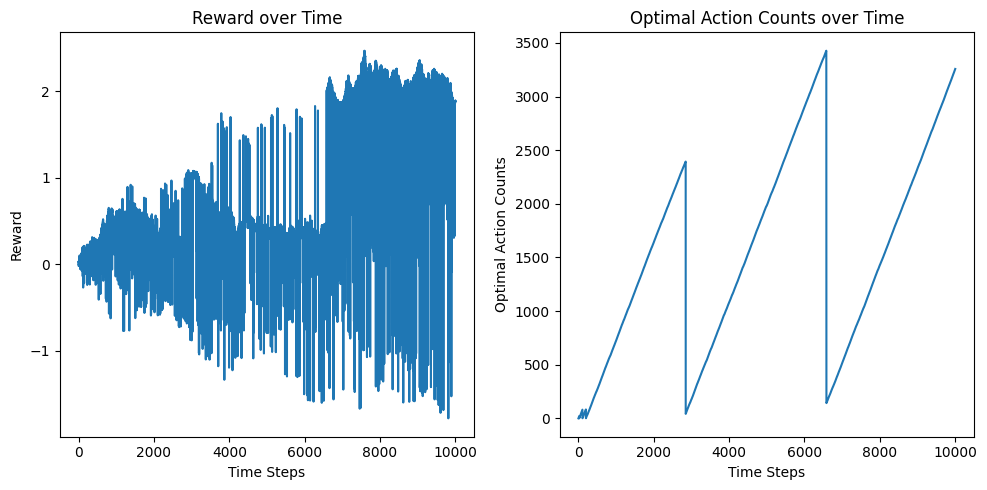

In [ ]:
#Q3

import numpy as np
import matplotlib.pyplot as plt

class TenArmedBandit:
    def __init__(self, num_arms, initial_reward=0.0, std_dev=0.01):
        self.num_arms = num_arms
        self.mean_rewards = np.full(num_arms, initial_reward)
        self.std_dev = std_dev

    def pull_arm(self, action):
        return np.random.normal(self.mean_rewards[action], self.std_dev)

def epsilon_greedy_nonstat(bandit, epsilon, num_iterations):
    num_actions = bandit.num_arms
    q_values = np.zeros(num_actions)
    action_counts = np.zeros(num_actions)

    rewards = []
    optimal_action_counts = []

    for i in range(1, num_iterations + 1):
        if np.random.rand() < epsilon:
            action = np.random.randint(num_actions)  # Explore
        else:
            action = np.argmax(q_values)  # Exploit

        reward = bandit.pull_arm(action)
        rewards.append(reward)

        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]

        optimal_action = np.argmax(q_values)
        optimal_action_counts.append(action_counts[optimal_action])

        # Update mean rewards with random walk
        bandit.mean_rewards += np.random.normal(0, bandit.std_dev, num_actions)

    return rewards, optimal_action_counts

# Initialize the 10-armed bandit
num_arms = 10
bandit = TenArmedBandit(num_arms)

# Parameters for epsilon-greedy algorithm
epsilon = 0.1
num_iterations = 10000

# Run epsilon-greedy algorithm for the non-stationary bandit
rewards, optimal_action_counts = epsilon_greedy_nonstat(bandit, epsilon, num_iterations)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, num_iterations + 1), rewards)
plt.xlabel('Time Steps')
plt.ylabel('Reward')
plt.title('Reward over Time')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, num_iterations + 1), optimal_action_counts)
plt.xlabel('Time Steps')
plt.ylabel('Optimal Action Counts')
plt.title('Optimal Action Counts over Time')

plt.tight_layout()
plt.show()
